# Update Wflow_sbm laterals

The Wflow_sbm laterals are updated to couple the hydrological model to D-HYDRO. The laterals used in D-HYDRO are added to the Wflow_sbm Geul parameterset. After trial and error, no duplicate laterals are found.

## Import required packages

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import hydromt_wflow
import geopandas as gpd

## Locate the original parameterset

In [39]:
mod = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\Wflow\wflow_sbm_geul"

## Open the model in adjustment mode

In [40]:
model = hydromt_wflow.WflowModel(mod, mode= 'r+')

## Read the staticmaps

The staticmaps contains the parameters in the Geul parameterset

In [41]:
model.read_staticmaps()

## View the staticmaps

In [43]:
model.staticmaps

<xarray.Dataset>
Dimensions:                       (lat: 33, lon: 50, time: 12, layer: 4)
Coordinates:
  * lat                           (lat) float64 50.92 50.91 50.9 ... 50.66 50.65
  * lon                           (lon) float64 5.718 5.727 ... 6.118 6.127
  * time                          (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * layer                         (layer) int64 0 1 2 3
    spatial_ref                   int32 0
Data variables: (12/73)
    x_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    y_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    idx_out                       (lat, lon) int32 -1 -1 -1 -1 ... -1 -1 -1 -1
    wflow_ldd                     (lat, lon) uint8 255 255 255 ... 255 255 255
    wflow_subcatch                (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_uparea                  (lat, lon) float32 -9.999e+03 ... -9.999e+03
    ...                            ...
    wflow_gauges_geul_stations    (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_geul_stations  (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_sobek            (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_sobek          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    pits                          (lat, lon) bool False False ... False False
    pits_stations                 (lat, lon) bool False False ... False False

## Plot the outline of the parameterset

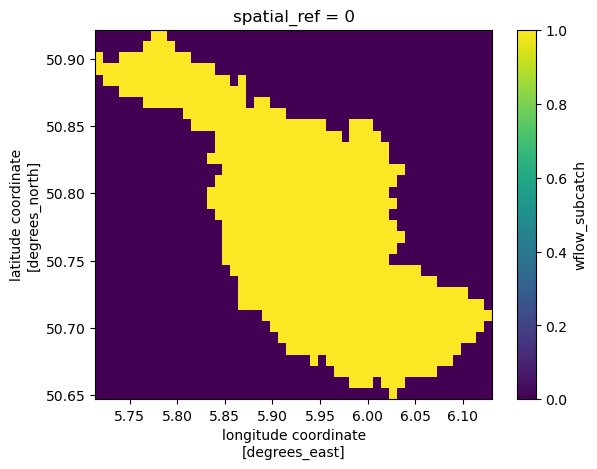

In [44]:
model.staticmaps.wflow_subcatch.plot()

## Remove the original pits

The original Geul parameterset is coupled to a Sobek model of the Geul. This model contains different locations of the laterals and have to be removed.

In [45]:
variables_to_remove = ['pits', 'pits_stations']
sm = model.staticmaps.drop_vars(variables_to_remove)

In [46]:
sm

<xarray.Dataset>
Dimensions:                       (lat: 33, lon: 50, time: 12, layer: 4)
Coordinates:
  * lat                           (lat) float64 50.92 50.91 50.9 ... 50.66 50.65
  * lon                           (lon) float64 5.718 5.727 ... 6.118 6.127
  * time                          (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * layer                         (layer) int64 0 1 2 3
    spatial_ref                   int32 0
Data variables: (12/71)
    x_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    y_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    idx_out                       (lat, lon) int32 -1 -1 -1 -1 ... -1 -1 -1 -1
    wflow_ldd                     (lat, lon) uint8 255 255 255 ... 255 255 255
    wflow_subcatch                (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_uparea                  (lat, lon) float32 -9.999e+03 ... -9.999e+03
    ...                            ...
    SoilThickness_1500_2000_2500  (lat, lon) int32 -999 -999 -999 ... -999 -999
    MaxLeak                       (lat, lon) float64 -999.0 -999.0 ... -999.0
    wflow_gauges_geul_stations    (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_geul_stations  (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_sobek            (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_sobek          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

## Save the adjusted staticmaps

In [47]:
sm.to_netcdf(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\Wflow\wflow_sbm_geul_test\staticmaps_ksh_gulp.nc")

## Open the adjusted parameterset

In [48]:
model = hydromt_wflow.WflowModel(mod, mode= 'r+')

## Read the adjusted staticmaps

In [49]:
model.read_staticmaps()

In [50]:
model.staticmaps

<xarray.Dataset>
Dimensions:                       (lat: 33, lon: 50, time: 12, layer: 4)
Coordinates:
  * lat                           (lat) float64 50.92 50.91 50.9 ... 50.66 50.65
  * lon                           (lon) float64 5.718 5.727 ... 6.118 6.127
  * time                          (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * layer                         (layer) int64 0 1 2 3
    spatial_ref                   int32 0
Data variables: (12/71)
    x_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    y_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    idx_out                       (lat, lon) int32 -1 -1 -1 -1 ... -1 -1 -1 -1
    wflow_ldd                     (lat, lon) uint8 255 255 255 ... 255 255 255
    wflow_subcatch                (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_uparea                  (lat, lon) float32 -9.999e+03 ... -9.999e+03
    ...                            ...
    SoilThickness_1500_2000_2500  (lat, lon) int32 -999 -999 -999 ... -999 -999
    MaxLeak                       (lat, lon) float64 -999.0 -999.0 ... -999.0
    wflow_gauges_geul_stations    (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_geul_stations  (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_sobek            (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_sobek          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

## Open the shapefile containing the laterals

In [51]:
shape = gpd.read_file('QGIS/Wflow laterals/wflow_lateralen.gpkg')
shape.to_crs(4326,inplace=True)

<Axes: >

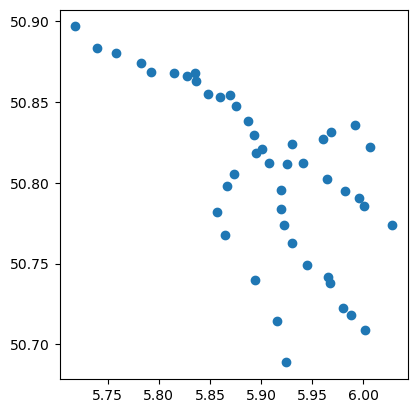

In [52]:
shape.plot()

## Add columns for the coordinates of the laterals

In [53]:
shape['x'] = shape.geometry.x
shape['y'] = shape.geometry.y

## Save the locations of the laterals as csv

In [54]:
shape.to_csv('laterals.csv')

## Setup the laterals and subcatchment based on the D-HYDRO laterals

In [55]:
model.setup_gauges(gauges_fn='laterals.csv',derive_subcatch=True)

In [56]:
model.staticmaps

<xarray.Dataset>
Dimensions:                       (lat: 33, lon: 50, time: 12, layer: 4)
Coordinates:
  * lat                           (lat) float64 50.92 50.91 50.9 ... 50.66 50.65
  * lon                           (lon) float64 5.718 5.727 ... 6.118 6.127
  * time                          (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * layer                         (layer) int64 0 1 2 3
    spatial_ref                   int32 0
Data variables: (12/73)
    x_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    y_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    idx_out                       (lat, lon) int32 -1 -1 -1 -1 ... -1 -1 -1 -1
    wflow_ldd                     (lat, lon) uint8 255 255 255 ... 255 255 255
    wflow_subcatch                (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_uparea                  (lat, lon) float32 -9.999e+03 ... -9.999e+03
    ...                            ...
    wflow_gauges_geul_stations    (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_geul_stations  (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_sobek            (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_sobek          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_laterals         (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_laterals       (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

## Plot the new subcatchments

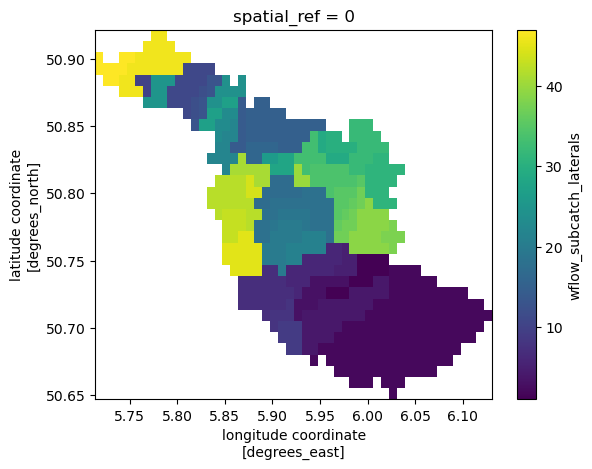

In [57]:
#model.staticmaps.wflow_subcatch.raster.mask_nodata().plot()
model.staticmaps.wflow_subcatch_laterals.raster.mask_nodata().plot()

## Setup the pits layer

The pits layer in the staticmaps contains the locations of the laterals. The pits are used to write the Wflow_sbm output to. The pits layer consists of ones at the locations of the laterals, with the other pixels left zero. The layer has to created manually. 

### Create an array containing the laterals

In [58]:
pits = np.array(model.staticmaps.wflow_gauges_laterals)

### The locations with a lateral get the value of one

In [59]:
pits[pits != 0] = 1

## Add the pits layer to the staticmaps

In [60]:
model.set_staticmaps(pits,'pits')

## Set the fillvalue

In [61]:
model.staticmaps.pits.attrs['_FillValue'] = 0

## Plot the pits layer and the laterals for comparison

(50.675, 50.89)

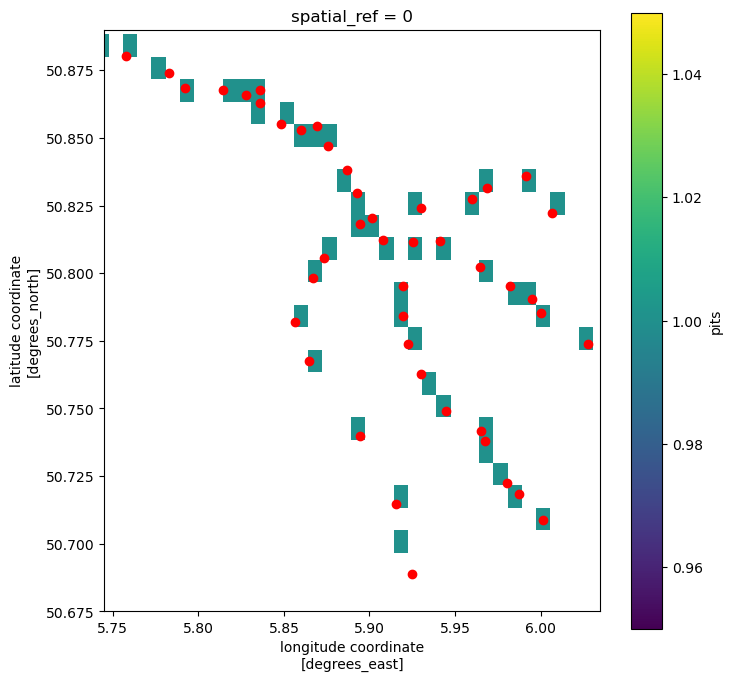

In [62]:
fig, ax = plt.subplots(figsize=(8,8))

model.staticmaps.pits.raster.mask_nodata().plot(ax=ax)
shape.plot(ax=ax,color='red')
plt.xlim(5.745,6.035)
plt.ylim(50.675,50.89)

## Save the updated staticmaps

In [63]:
model.staticmaps.to_netcdf(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\Wflow\wflow_sbm_geul_test\staticmaps_ksh_gulp.nc")
model.write_staticmaps()
model.write_staticgeoms()

## Open the parameterset again

Import to check if the updated staticmaps is correctly saved

In [64]:
model = hydromt_wflow.WflowModel(mod, mode= 'r+')

In [65]:
model.read_staticmaps()

In [66]:
model.staticmaps

<xarray.Dataset>
Dimensions:                       (lat: 33, lon: 50, time: 12, layer: 4)
Coordinates:
  * lat                           (lat) float64 50.92 50.91 50.9 ... 50.66 50.65
  * lon                           (lon) float64 5.718 5.727 ... 6.118 6.127
  * time                          (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * layer                         (layer) int64 0 1 2 3
    spatial_ref                   int32 0
Data variables: (12/74)
    x_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    y_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    idx_out                       (lat, lon) int32 -1 -1 -1 -1 ... -1 -1 -1 -1
    wflow_ldd                     (lat, lon) uint8 255 255 255 ... 255 255 255
    wflow_subcatch                (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_uparea                  (lat, lon) float32 -9.999e+03 ... -9.999e+03
    ...                            ...
    wflow_subcatch_geul_stations  (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_sobek            (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_sobek          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_laterals         (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_laterals       (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    pits                          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

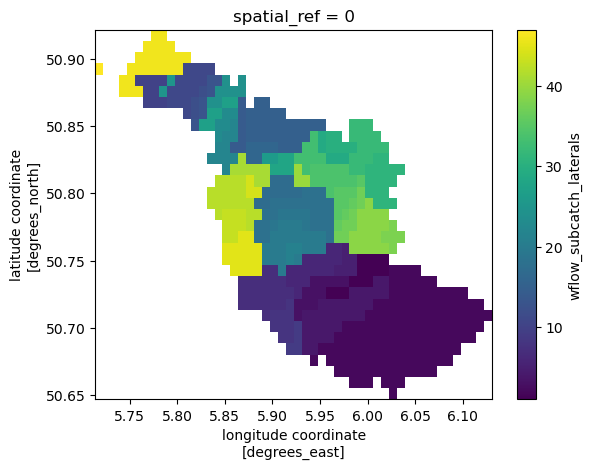

In [48]:
model.staticmaps.wflow_subcatch_laterals.raster.mask_nodata().plot()